# Evaluation terminale : Machine learning & python -- Nom Prénom

Cet examen se compose de 3 parties : 
<ol>
  <li>Restitution théorique</li>
  <li>Restitution pratique</li>
  <li>Cas pratique</li>
</ol>

## Partie 1 : Restitution théorique

Pour cette partie, l'objectif est de décrire des notions théoriques. Essayez de rédiger des réponses claires en utilisant vos mots.

#### Question 1.1: Donner une définition du machine learning. Eviter de recopier de wikipédia, essayer d'en donner une description en quelques mots.

Réponse  
Le machine learning est un domaine de l'IA qui permet à un ordinateur de s'adapter et d'apprendre par lui-même à partir de données.

#### Question 1.2: Donner quelques applications concrètes d'utilisation du machine learning.


Réponse  
Il peut etre appliqué pour la classification de documents, ou pour la détection de visages.


#### Question 1.3: Quelles sont les 2 principales familles "d'apprentissage"? Donner une rapide définition de chacune

Réponse  
Les 2 familles principales sont : le machine learning supervisé qui peut etre utilisé pour guider un algorithme dans la bonne direction en donnant des exemples et le machine learning non supervisé qui est totalement autonome.



#### Question 1.4: Dans laquelle de ces familles appartient la "classification"? Le "clustering"?

Réponse  
La classification appartient à la famille machine learning supervisé et le clustering appartient à la famille machine learning non supervisé.



#### Question 1.5: Définissez ce qu'est un arbre de décision et décrivez  de manière simple sa construction.

Réponse  
C'est un graphique qui montre toutes les decisions possibles qui peuvent être prises, ces décisions sont situés au bout de branches connectées aux decisions précédentes.



#### Question 1.6: Dans quelle situation parle-t-on "d'overfitting"?

Réponse  
On peut parler d'overfitting quand un modèle prend en compte trop de données.



## Partie 2 : Etude d'un cas pratique

Pour cette partie, vous devrez vous inspirer des TP réalisés en cours. 

Il vous faut importer les librairies qui vous seront nécessaires répondre à la problèmatique dans la cellule suivante :

In [5]:
import pandas as pd
#from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import GridSearchCV


Importez les données comme suit :

In [6]:
data = pd.read_csv('nba_logreg.csv')

Ce jeu de données décrit les caracteristiques de jeu de joueurs de Basketball au sein de la NBA. La variable d'intérêt Y est "TARGET_5yrs". La description de ce dataset se trouve dans le fichier "NBA_variables_doc.png"

__L'objectif du problème est de réussir à prédire si un jeune joueur durera plus ou moins que 5ans au sein de la ligue.__

In [7]:
data

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


In [ ]:
#stat_analysis = ProfileReport(data)
#stat_analysis

#### Question 2.1: Donnez au moins une colonne qui doit être enlevé du jeu de données. Pourquoi? 

Réponse   
On peut retirer la colonne Name car elle n'est pas indispensable afin de résoudre notre problème


#### Exercice 2.1: Enlevez les variables du dataset qui vous semble inutile au problème.

In [8]:
#Supprimer colonne inutile
data.drop(columns=['Name'],axis=1, inplace=True)

#### Question 2.2: Ce dataset contient - il des données manquantes ou non exploitable?

Réponse   
Oui, on peut retirer la colonne 3P% car elle a le même nom que la colonne précedente : 3PointAttempts


#### Exercice 2.2: Si oui, donnez en la proportion par colonne.

In [9]:
for col in data.columns:
    p_nan = data[col].isnull().sum()/len(data)
    if p_nan != 0:
        print(f'{col} : {p_nan*100}%')

data.dropna(inplace=True)

3P% : 0.8208955223880596%


In [10]:
data.drop(columns=['3P%'],axis=1, inplace=True)

In [11]:
data

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


#### Exercice 2.3: Séparez les données en 2 échantillons train-test

In [12]:
Y = data['TARGET_5Yrs']
X = data.drop(labels=['TARGET_5Yrs'], axis=1)

# Séparation en 2 échantillons train-test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

#### Question 2.3: Pourquoi cette étape est-elle indispensable?

Réponse   
Il est important de séparer les données en deux échantillons, un pour l'entraînement et un pour les tests, car cela permet de mesurer l'efficacité du modèle de machine learning.

#### Exercice 2.4: Entrainez sur ces données un arbre de décision. Calculer une prédiction.

In [13]:
# calling decisiontree classifier
clf = DecisionTreeClassifier()
#criterion= 'entropy', max_depth=max_depth, min_samples_split=0.1
# fitting on data
clf = clf.fit(X_train, Y_train)
# estimating on test
estimate = clf.predict_proba(X_test)[:,1]
true = Y_test


0.6112140323216397


#### Exercice 2.5: Evaluez la qualité du modèle. 

In [19]:
# building AUC
fpr, tpr, _ = roc_curve(Y_test,  estimate)
auc_ = auc(fpr, tpr)
print(auc_)

0.7389042175798187


#### Question 2.4: Quelle métrique utilisez vous? Pourquoi? 

Réponse   
La courbe de roc.
L’aire sous la courbe (AUC) permet d’évaluer quantitativement le meilleur modèle au sens de ce critère. L’AUC représente la probabilité que le modèle soit capable de distinguer entre la classe positive et négative.

#### Question 2.5: Le modèle construit est-il de qualité satisfaisante? Expliquez.

Réponse  
Oui, le modèle construit est de qualité satisfaisante mais on peut surement faire mieux, l'auc est de 0,56
et plus l'auc est proche de 1 plus le modèle est de qualité

#### Exercice 2.6: Produisez une visualisation graphique de l'arbre construit

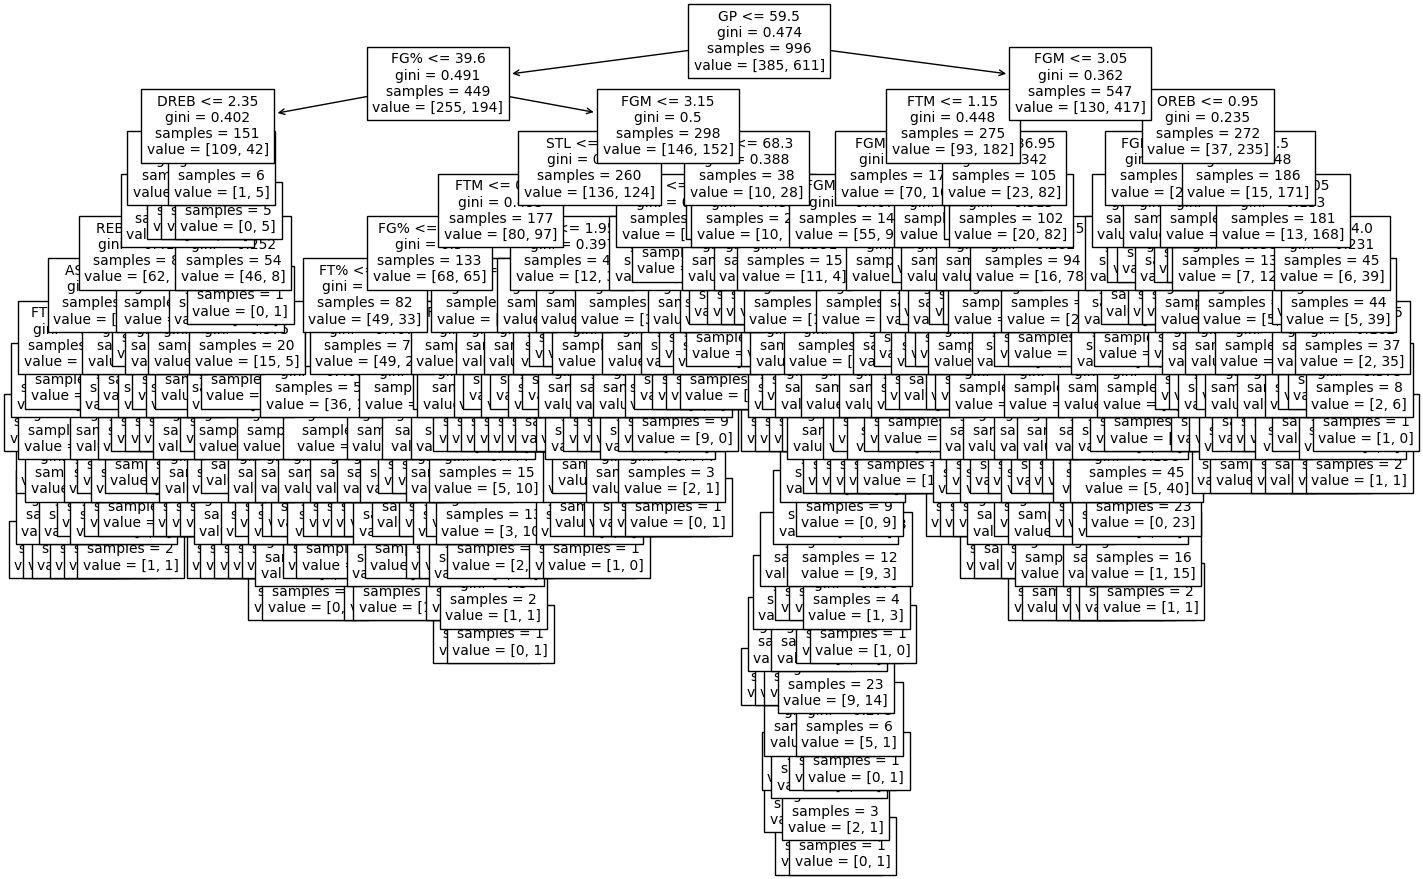

In [15]:
# plotting tree
plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

#### Question 2.6: Donnez un exemple de lecture d'un tel arbre.

Réponse 
Pour lire un arbre de décision comme ci-dessus : 
- Il faut commencer par l'étiquette de la racine de l'arbre qui décrit l'attribut sur lequel l'arbre se base pour prendre des décisions.
- Ensuite, regardez les branches qui partent de la racine. Chaque branche correspond à une valeur possible de l'attribut de la racine.
- Suivez la branche qui correspond à la valeur de l'attribut que vous souhaitez évaluer. Si cette branche mène à une feuille (un noeud sans branches), cette feuille contiendra l'étiquette de la classe ou de la valeur prédite par l'arbre.

#### Question 2.7: Comment peut - on améliorer la qualité du modèle? Donnez au moins 3 méthodes:

Réponse   

- Obtenir plus de données d'entraînement : Plus un modèle a de données d'entraînement sur lesquelles il peut apprendre, plus il sera en mesure de généraliser correctement aux données de test.

- Améliorer les caractéristiques : La qualité des caractéristiques (ou features) utilisées par le modèle peut avoir un fort impact sur ses performances. Il peut être utile de mettre en place un processus de sélection de caractéristiques pour sélectionner les plus pertinentes ou de créer de nouvelles caractéristiques à partir de celles existantes.

- Optimiser les hyperparamètres : Les hyperparamètres sont des paramètres qui ne sont pas appris directement par le modèle lors de l'entraînement, mais qui doivent être définis par l'utilisateur. La sélection des bons hyperparamètres peut avoir un impact significatif sur les performances du modèle. Il existe plusieurs techniques pour optimiser les hyperparamètres, telles que la validation croisée ou la recherche aléatoire.

#### Exercice 2.7: Essayer d'appliquer une de ces méthodes

In [16]:
# Hyperparameters space
param_space = {'criterion':[ 'entropy', 'gini'], 
               'max_depth': list(range(2,10,1)),
               #'min_samples_split':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.],
               'min_samples_split':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07],
               'random_state': [42]}

# calling classifier
clf_grid = DecisionTreeClassifier()

# running search
grid_search_tree = GridSearchCV(estimator=clf_grid,
                                param_grid=param_space,
                                scoring='roc_auc',
                                cv=8)
# running search
grid_search_tree.fit(X, Y.values)

# getting best model
best_parameters = grid_search_tree.best_params_
best_auc = grid_search_tree.best_score_
print('best parameters: ' + str(best_parameters))
print('best auc: ' + str(best_auc))

best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 0.07, 'random_state': 42}
best auc: 0.7042242324121142


In [17]:
# calling decisiontree classifier
clf = DecisionTreeClassifier(criterion= 'gini', max_depth=3, min_samples_split=0.1, random_state=42)
#
# fitting on data
clf = clf.fit(X_train, Y_train)
# estimating on test
estimate = clf.predict_proba(X_test)[:,1]
true = Y_test
# building AUC
fpr, tpr, _ = roc_curve(Y_test,  estimate)
auc_ = auc(fpr, tpr)
print(auc_)

0.7389042175798187


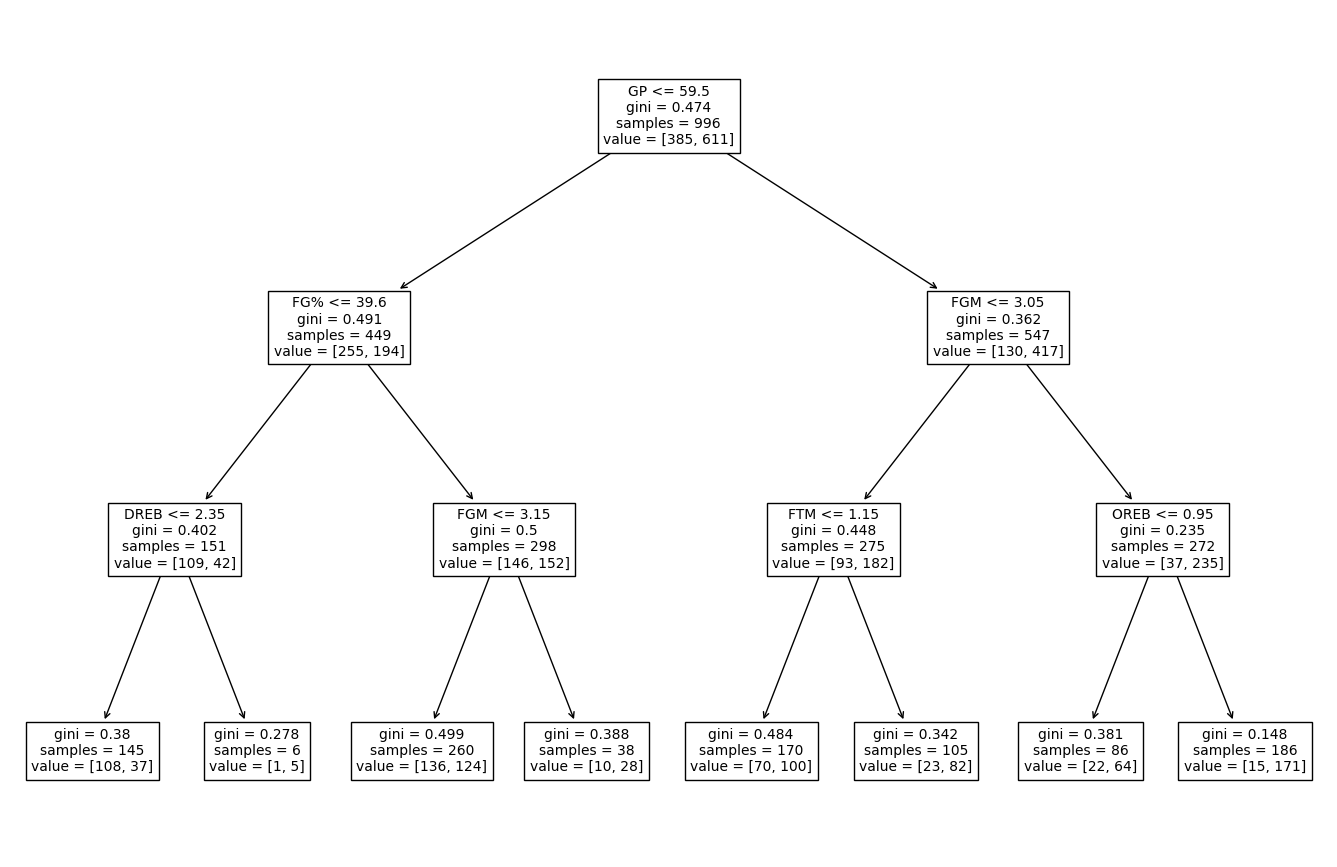

In [18]:
# plotting tree
plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

#### Question 2.8: Concluez

Réponse :   
Cet arbre permet de prédire avec un taux d'environ 73% si un jeune joueur durera plus ou moins que 5ans au sein de la ligue en fonctions de ses performances.